In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
file_path = '/content/dataset_heart.csv'
dataset = pd.read_csv(file_path)


In [15]:
# Rename columns for easier access

dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholesterol',
    'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
    'oldpeak', 'st_slope', 'major_vessels', 'thal', 'heart_disease']

In [16]:
# Check for missing values

print(dataset.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
serum_cholesterol          0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
st_slope                   0
major_vessels              0
thal                       0
heart_disease              0
dtype: int64


In [17]:
# Display the first few rows of the dataset

print(dataset.head())

   age  sex  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0   70    1                4                     130                322   
1   67    0                3                     115                564   
2   57    1                2                     124                261   
3   64    1                4                     128                263   
4   74    0                2                     120                269   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            2             109                        0   
1                    0            2             160                        0   
2                    0            0             141                        0   
3                    0            0             105                        1   
4                    0            2             121                        1   

   oldpeak  st_slope  major_vessels  thal  heart_disease  
0      2.

In [18]:
# Display basic statistics

print(dataset.describe())

              age         sex  chest_pain_type  resting_blood_pressure  \
count  270.000000  270.000000       270.000000              270.000000   
mean    54.433333    0.677778         3.174074              131.344444   
std      9.109067    0.468195         0.950090               17.861608   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     55.000000    1.000000         3.000000              130.000000   
75%     61.000000    1.000000         4.000000              140.000000   
max     77.000000    1.000000         4.000000              200.000000   

       serum_cholesterol  fasting_blood_sugar  resting_ecg  max_heart_rate  \
count         270.000000           270.000000   270.000000      270.000000   
mean          249.659259             0.148148     1.022222      149.677778   
std            51.686237             0.355906     0.997891       23.165717   
min           126.000

In [19]:
# Set plot style

sns.set(style="whitegrid")

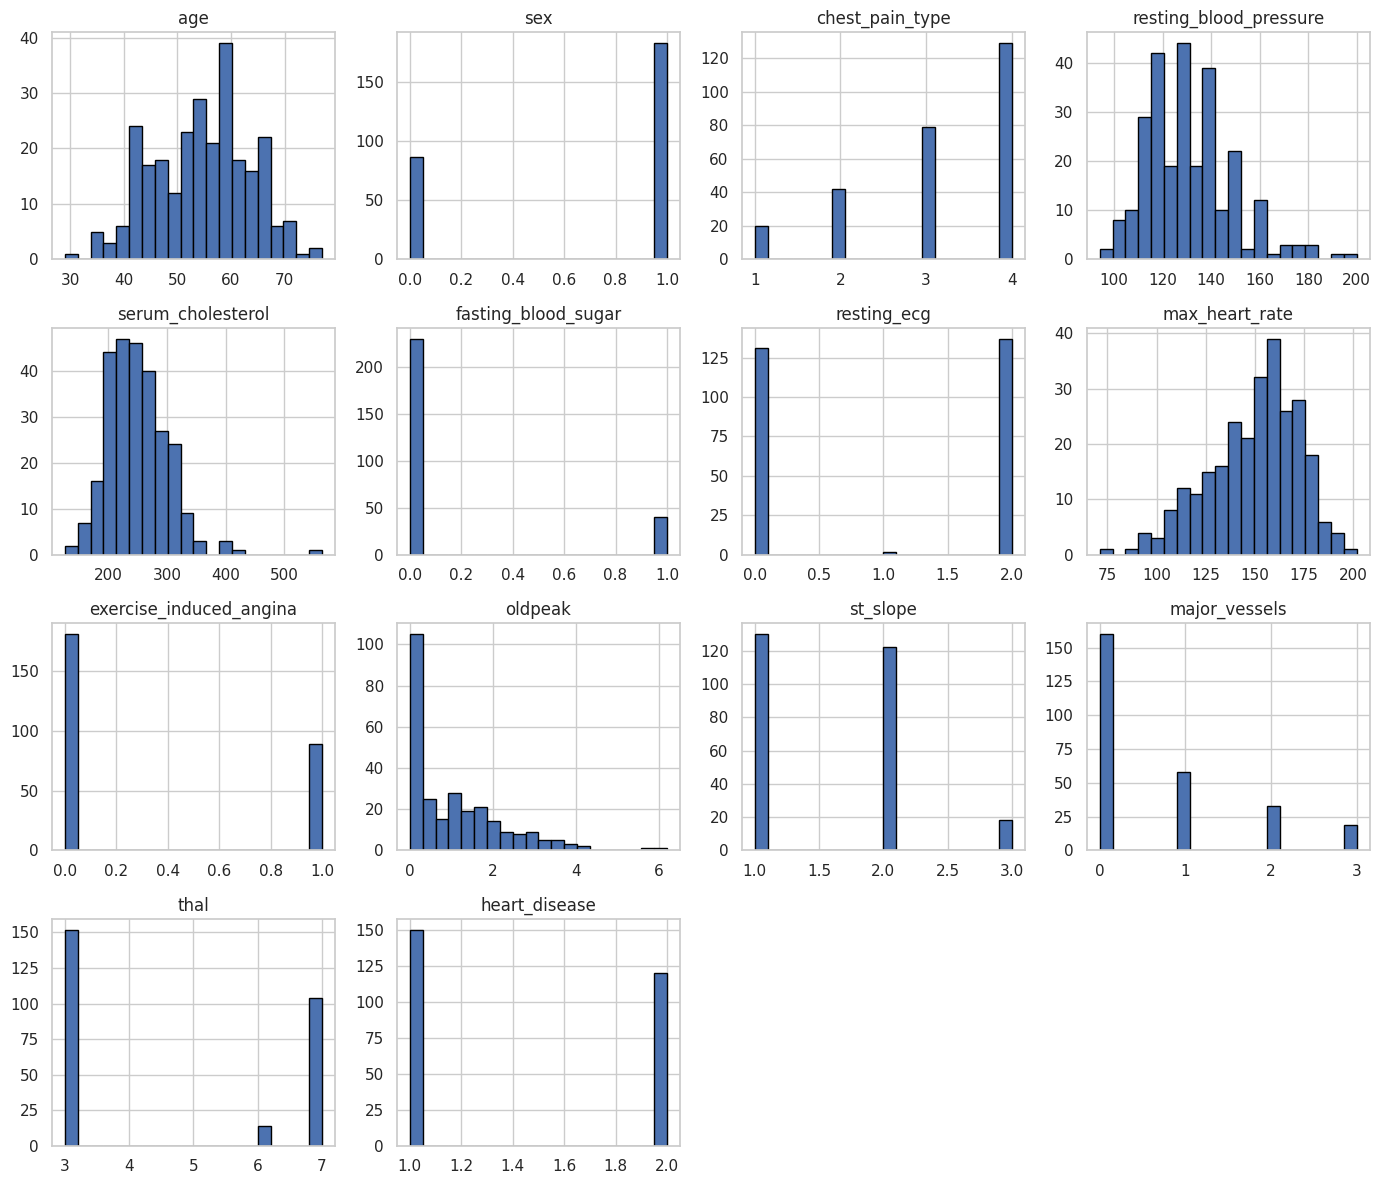

In [20]:
# Plot histograms for numerical features

dataset.hist(figsize=(14, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

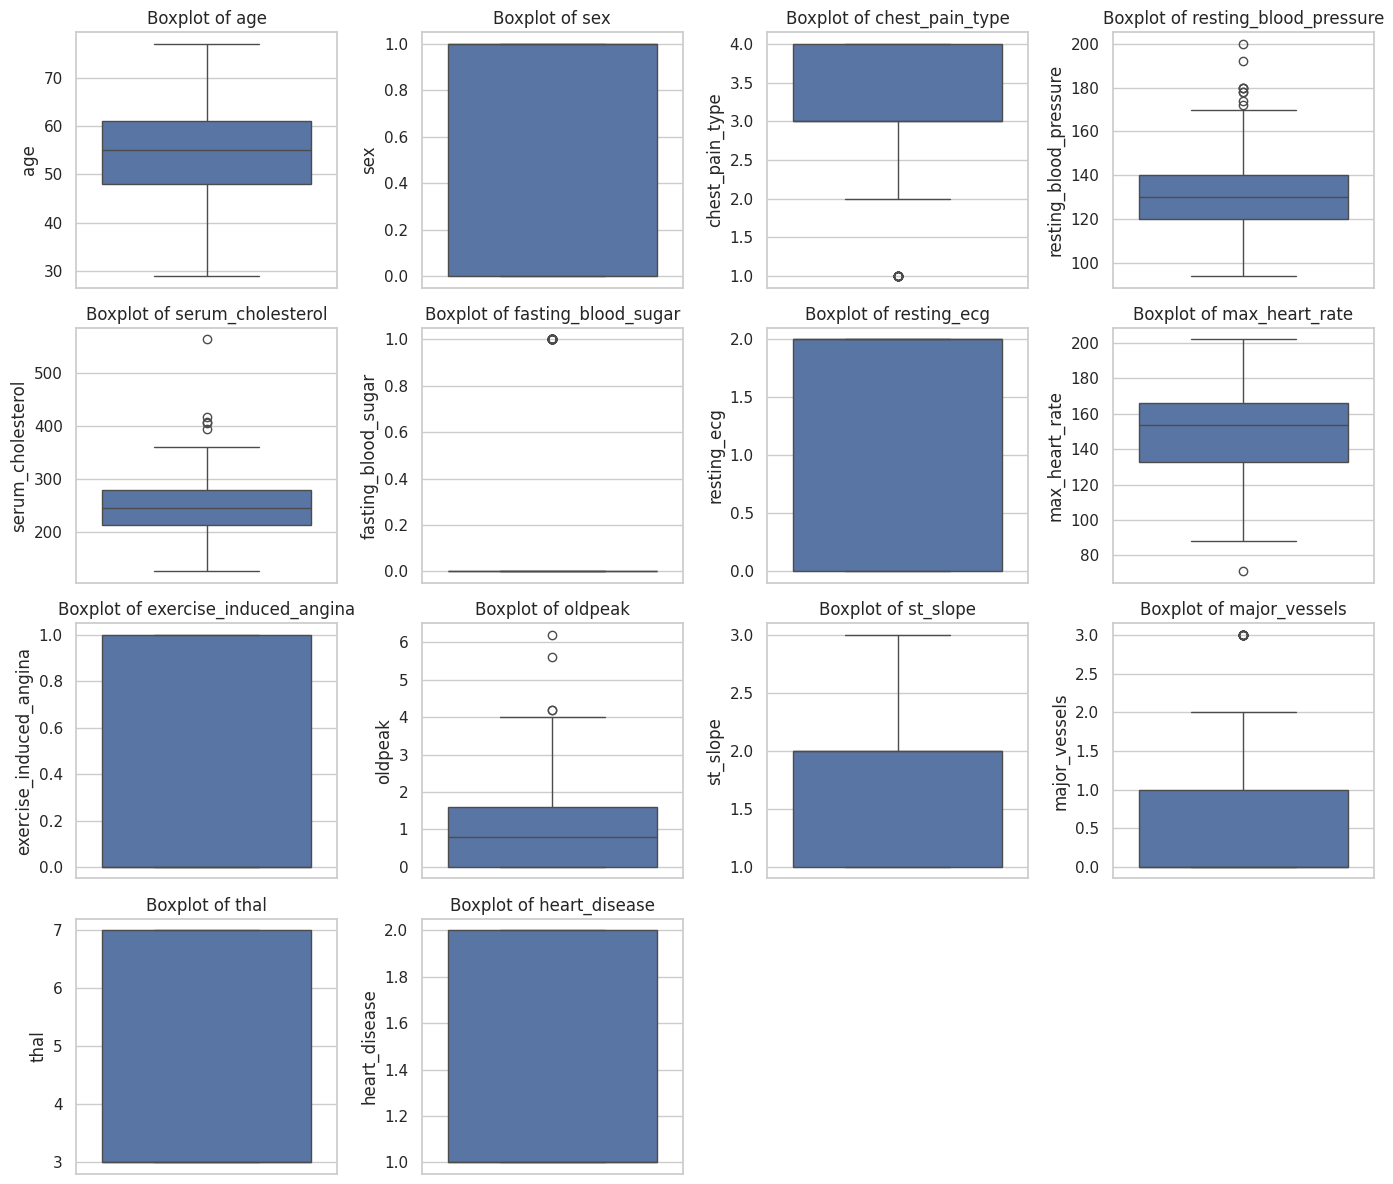

In [21]:
# Plot boxplots for numerical features to identify outliers

plt.figure(figsize=(14, 12))
for i, column in enumerate(dataset.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=dataset[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [22]:
# Correlation matrix

correlation_matrix = dataset.corr()

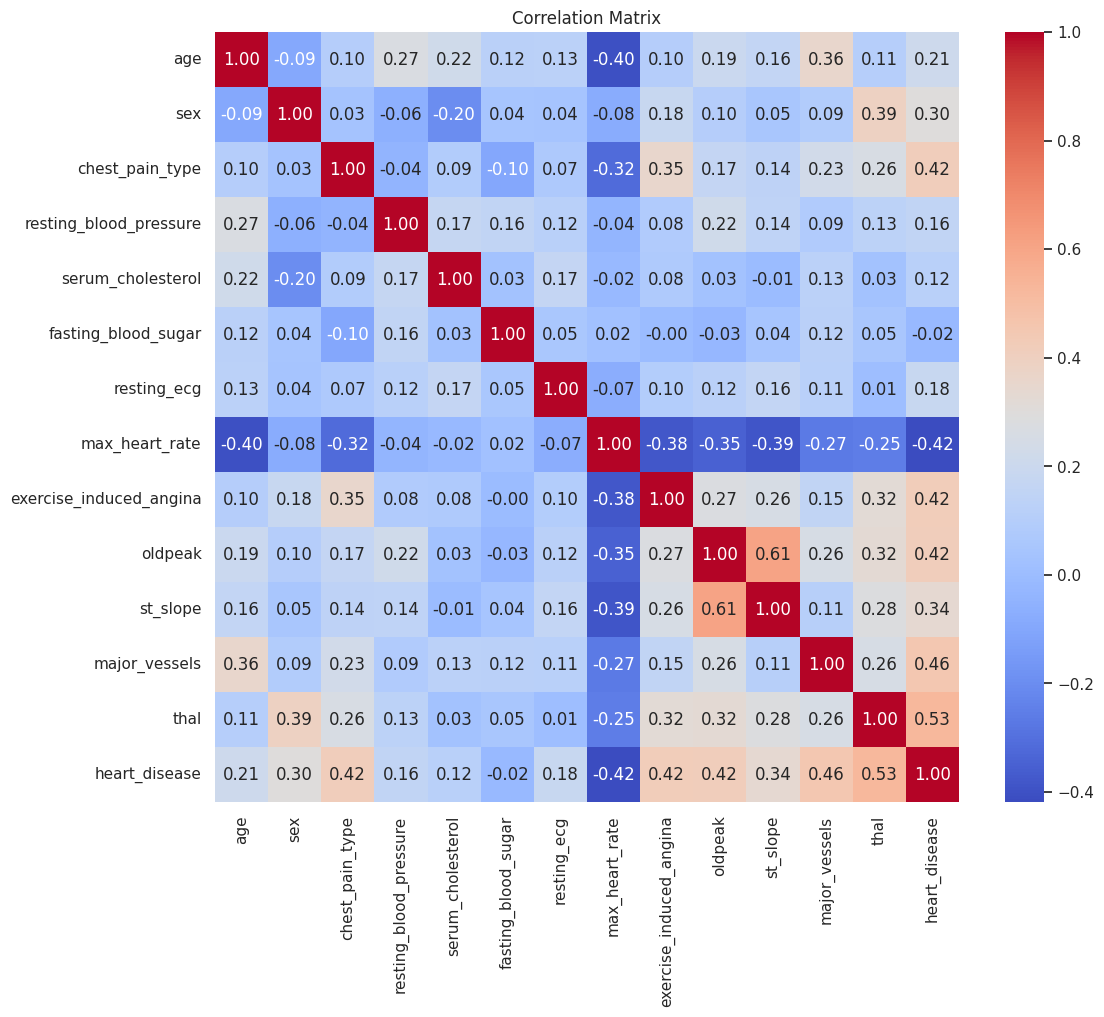

In [23]:
# Heatmap of the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

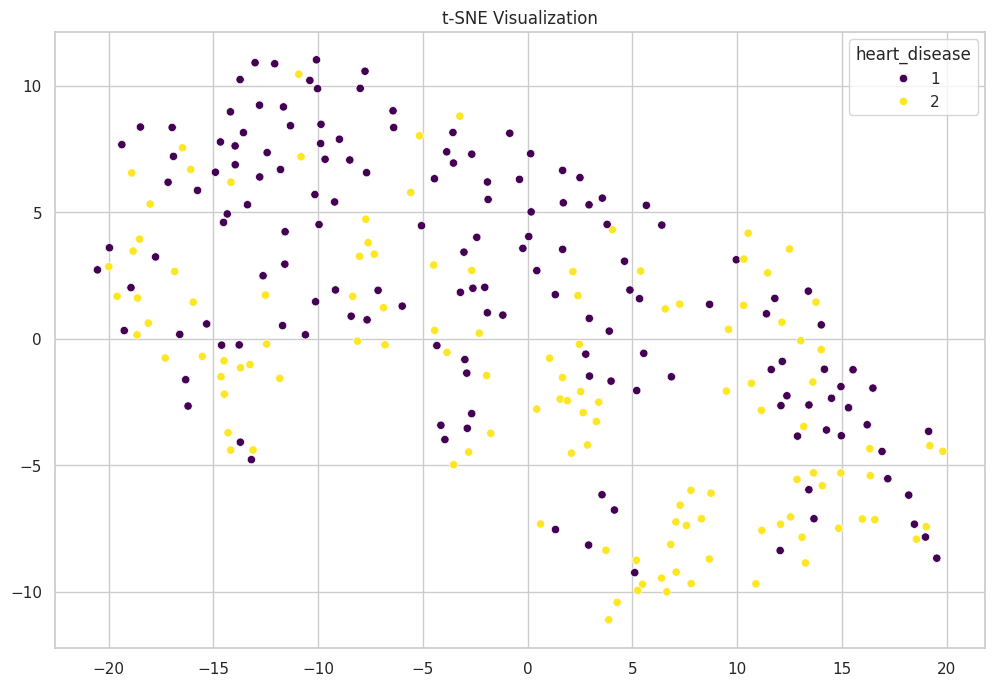

In [27]:
# t-SNE visualization

from sklearn.manifold import TSNE

# Feature selection for t-SNE

features = dataset.drop(columns=['heart_disease'])
target = dataset['heart_disease']

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=target, palette='viridis')
plt.title('t-SNE Visualization')
plt.show()